# Volcano Eruption
## Kelompok 6
* Deva Shofa Al Fathin (2000793)
* Ellsya Nabella Nur'allifa (2009037)
* Raihan Taufiqurrahman (2000385)
* Vegatama Firdiady (200340)

Data yang kami ambil berasal dari Smithsonian Institution dan diambil dari website dengan link tertera;

https://www.kaggle.com/jessemostipak/volcano-eruptions

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset
* Data Volcano (dv)
* Data Eruption (de)

In [4]:
dv = pd.read_csv("C:\\Users\\vegat\\Desktop\\volcano data\\volcano.csv")
de = pd.read_csv("C:\\Users\\vegat\\Desktop\\volcano data\\eruptions.csv")

## Eksplorasi Data Volcano

In [4]:
dv[-5:]

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
953,300242,Zimina,Stratovolcano(es),Unknown,Russia,Kamchatka and Mainland Asia,Kamchatka Peninsula,55.862,160.603,3057,...,,,,,,,0,0,77,11184
954,341061,Zitacuaro-Valle de Bravo,Caldera,-3050,Mexico,México and Central America,Mexico,19.400,-100.250,3500,...,,Trachyandesite / Basaltic Trachyandesite,Trachybasalt / Tephrite Basanite,,,,231977,231977,490440,4838069
955,221020,Zubair Group,Shield,2013,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,15.050,42.180,191,...,,,,,,,7,7,7,671171
956,221021,Zukur,Shield,Unknown,Yemen,Africa and Red Sea,Africa (northeastern) and Red Sea,14.020,42.750,624,...,,,,,,,508,922,1075,1472800
957,327120,Zuni-Bandera,Volcanic field,-1170,United States,Canada and Western USA,USA (New Mexico),34.800,-108.000,2550,...,,,,,,,18,18,246,54738


In [6]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_number            958 non-null    int64  
 1   volcano_name              958 non-null    object 
 2   primary_volcano_type      958 non-null    object 
 3   last_eruption_year        958 non-null    object 
 4   country                   958 non-null    object 
 5   region                    958 non-null    object 
 6   subregion                 958 non-null    object 
 7   latitude                  958 non-null    float64
 8   longitude                 958 non-null    float64
 9   elevation                 958 non-null    int64  
 10  tectonic_settings         958 non-null    object 
 11  evidence_category         958 non-null    object 
 12  major_rock_1              958 non-null    object 
 13  major_rock_2              958 non-null    object 
 14  major_rock

Dapat dilihat dari dv.info() ada 26 atribut dengan berbagai tipe, Total terdapat 958 baris data dan tidak Ada atribut dengan data null. 

### Drop data
* setelah ditelusuri ada beberapa atribut yang cukup kompleks dan tidak dibutuhkan seperti major rock, minor rock, tectonic setting.

In [5]:
dv = dv.drop(['major_rock_1','major_rock_2','major_rock_3','major_rock_4','major_rock_5',
              'minor_rock_1','minor_rock_2','minor_rock_3','minor_rock_4','minor_rock_5', 
              'tectonic_settings'],axis=1)

In [11]:
dv.last_eruption_year.value_counts()

Unknown    301
2020        46
2019        14
2018        12
2008        10
          ... 
838          1
1991         1
-9540        1
1631         1
1630         1
Name: last_eruption_year, Length: 342, dtype: int64

* setelah atribut last_eruption_year di cek terdapat banyak data yang tidak diketahui oleh karena itu atribut tersebut tidak relevan dan harus di drop.

In [6]:
dv = dv.drop(['last_eruption_year'],axis=1)

* Di dalam data terdapat 4 atribut yang menyatakan populasi berdasarkan jarak. setelah ditelusuri, Atribut 100 KM tidak dibutuhkan karena berada terlalu jauh dari gunung berapi.

In [7]:
dv = dv.drop(['population_within_100_km'],axis=1)

#### info data setelah di drop

In [9]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   volcano_number           958 non-null    int64  
 1   volcano_name             958 non-null    object 
 2   primary_volcano_type     958 non-null    object 
 3   country                  958 non-null    object 
 4   region                   958 non-null    object 
 5   subregion                958 non-null    object 
 6   latitude                 958 non-null    float64
 7   longitude                958 non-null    float64
 8   elevation                958 non-null    int64  
 9   evidence_category        958 non-null    object 
 10  population_within_5_km   958 non-null    int64  
 11  population_within_10_km  958 non-null    int64  
 12  population_within_30_km  958 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 74.9+ KB


setelah di drop jumlah atribut menjadi 12

### Visualisasi Data

#### Tabel Jumlah Gunung Berapi Per-Negara

<AxesSubplot:xlabel='count', ylabel='country'>

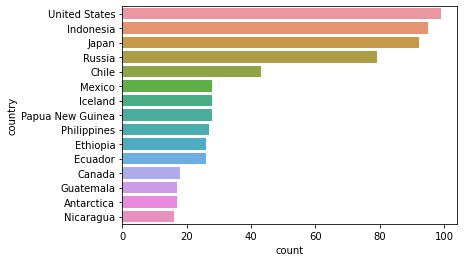

In [23]:
sns.countplot(y="country", data=dv, order = dv.country.value_counts().iloc[:15].index)

* dari tabel di atas diketahui bahwa Amerika, indonesia, dan jepang memiliki banyak gunung berapi di atas 80 buah. sedangkan rusia dan chilie memiliki gunung berapi di atas 40 buah dan sisanya memiliki gunung berapi di bawah 40 buah.

#### Tabel Jumlah Populasi di Sekitar Gunung Berapi di Indonesia

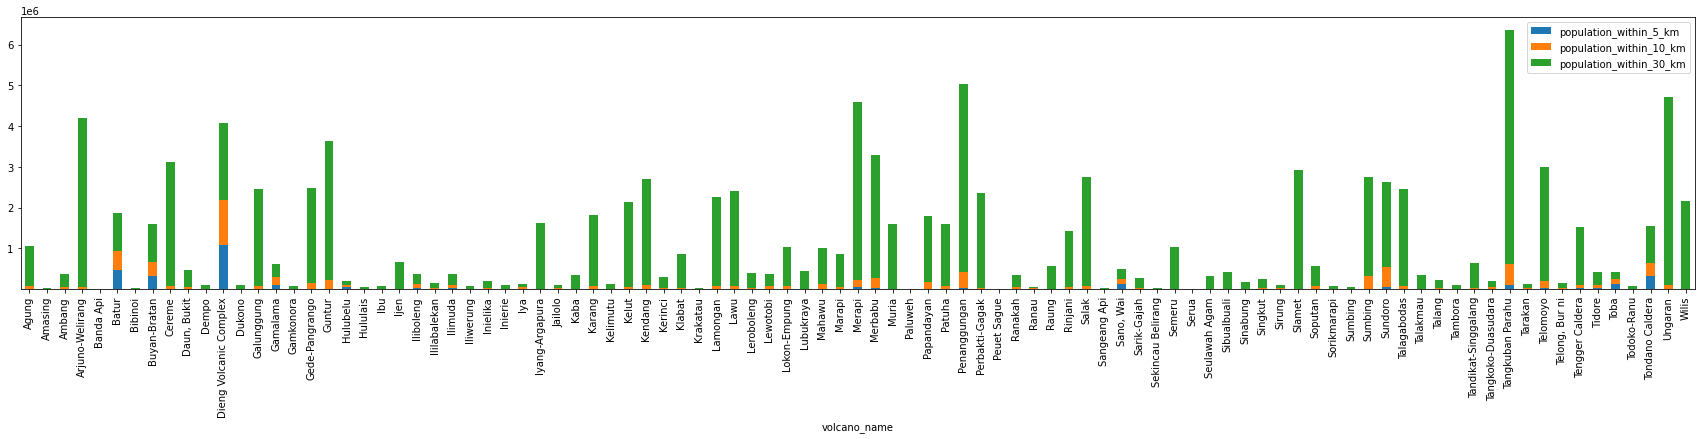

In [15]:
popl = dv[(dv.country == "Indonesia")][["volcano_name", "population_within_5_km", "population_within_10_km", "population_within_30_km"]]
fig, ax = plt.subplots(figsize=(30, 5))
popl.plot.bar(ax = ax, x = "volcano_name",stacked=True)
plt.show()

* Dari tabel di atas dapat disimpulkan bahwa beberapa gunung di Indonesia juga memiliki populasi yang cukup banyak di jarak yang cukup dekat.
* di dieng terdapat cukup banyak populasi pada 5-10 km mungkin dikarenakan dieng termasuk area kawah yang cukup pasif dan termasuk area wisata.
* di gunung tangkuban perahu memiliki populasi dalam 30 km yang paling banyak dan dalam 5-10 km yang sedang, bisa disimpulkan bahwa populasi yang banyak tersebut dikarenakan tangkuban perahu berada cukup dekat kota bandung dan daerah sekitarnya yang menjadi area wisata.

#### Persebaran Lokasi Gunung Berapi di Indonesia 

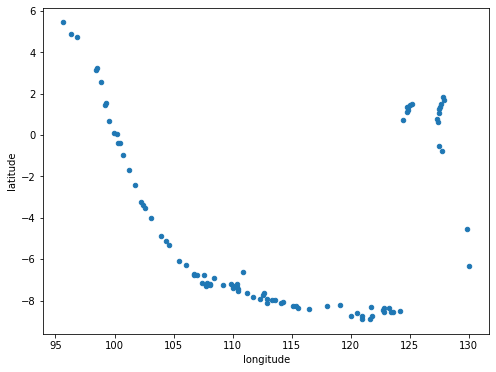

In [16]:
ind = dv[(dv.country == "Indonesia")]
fig, ax = plt.subplots(figsize=(8,6))
ind.plot(x="longitude", y="latitude", kind="scatter", ax = ax)
plt.show()

* Dari scatterplot di atas dapat dilihat bahwa perseberan gunung banyak terkumpul di titik 108 sampai 115 atau pulau jawa.

## Eksplorasi Data Eruption

In [49]:
de[-5:]

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
11173,324020,Craters of the Moon,21101,Confirmed Eruption,Sunset cone,0.0,-10060.0,NaN,NaN,Radiocarbon (uncorrected),NaN,NaN,NaN,43.420,-113.500
11174,222161,Igwisi Hills,22141,Confirmed Eruption,NE Volcano,1.0,-10450.0,NaN,NaN,Surface Exposure,NaN,NaN,NaN,-4.889,31.933
11175,357121,Quetrupillan,22351,Confirmed Eruption,NaN,3.0,-10658.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11176,357121,Quetrupillan,22352,Confirmed Eruption,NaN,3.0,-11345.0,NaN,NaN,Radiocarbon (corrected),NaN,NaN,NaN,-39.496,-71.722
11177,390090,Saunders,21099,Confirmed Eruption,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-57.800,-26.483


In [50]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

Dapat dilihat dari de.info() ada 15 atribut dengan berbagai tipe, Total terdapat 11178 baris data dan Ada beberapa atribut dengan data null. 

### Drop dan Normalisasi Data

* setelah ditelusuri ada beberapa atribut tidak dibutuhkan seperti 'start_month','start_day','end_year','end_month','end_day' karena sudah dapat diwakilkan oleh start_year dan cukup banyak data tersebut null.

In [12]:
de = de.drop(['start_month','start_day','end_year','end_month','end_day'],axis=1)

* setelah ditelusuri ada beberapa atribut yang tidak dibutuhkan yaitu yang menyatakan kordinat seperti latitude dan longitude.

In [13]:
de = de.drop(['latitude','longitude'],axis=1)

##### cek data area_of_activity.value

In [54]:
de.area_of_activity.value_counts()

Naka-dake                                   172
Bromo                                        63
Ngauruhoe                                    52
Mihara-yama                                  47
Ohachi                                       45
                                           ... 
South flank (2100-1950 m, M. Calcarazzi)      1
West flank (Pico Joao Fernandes)              1
NW rift zone (Los Hornitos)                   1
Fugen-dake (Kazaana)                          1
Norfolk Island Ridge                          1
Name: area_of_activity, Length: 2592, dtype: int64

* Dari data atribut tersebut hanya 2000-an data dari 11000-an data yang terisi, oleh karena itu data tersebut tidak valid dan perlu di drop.

In [14]:
de = de.drop(['area_of_activity'],axis=1)

In [17]:
de.isnull().sum()

volcano_number               0
volcano_name                 0
eruption_number              0
eruption_category            0
vei                       2906
start_year                   1
evidence_method_dating    1280
dtype: int64

* Terlihat bahwa atribut vei atau volcanic eruption index memiliki cukup bayak atribit yang null maka dikakukan pengisian data yang null mejadi 0.0

In [19]:
de.vei.fillna(de.vei.mode()[0.0], inplace=True)

#### info data setelah di drop

In [20]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   vei                     11178 non-null  float64
 5   start_year              11177 non-null  float64
 6   evidence_method_dating  9898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 480.4+ KB


Setelah di drop jumlah atribut menjadi 7 dan hanya ada sedikit atribut yang null.

### Visualisasi Data

#### Tabel jumlah erupsi yang terjadi sesuai kategori

<AxesSubplot:xlabel='eruption_category', ylabel='count'>

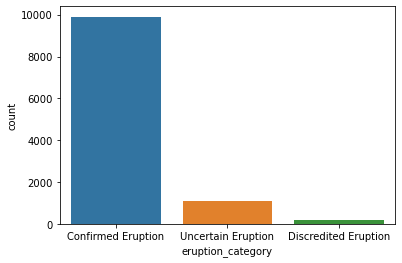

In [58]:
sns.countplot(x="eruption_category", data=de)

* Dari tabel di atas dapat disimpulkan bahwa data erupsi yang terkonfirmasi jumlahnya lebih banyak daripada erupsi yang belum terkonfirmasi dan masih diragukan.

#### Hubungan atribut evidence_method_dating dengan eruption_category

<AxesSubplot:xlabel='evidence_method_dating', ylabel='count'>

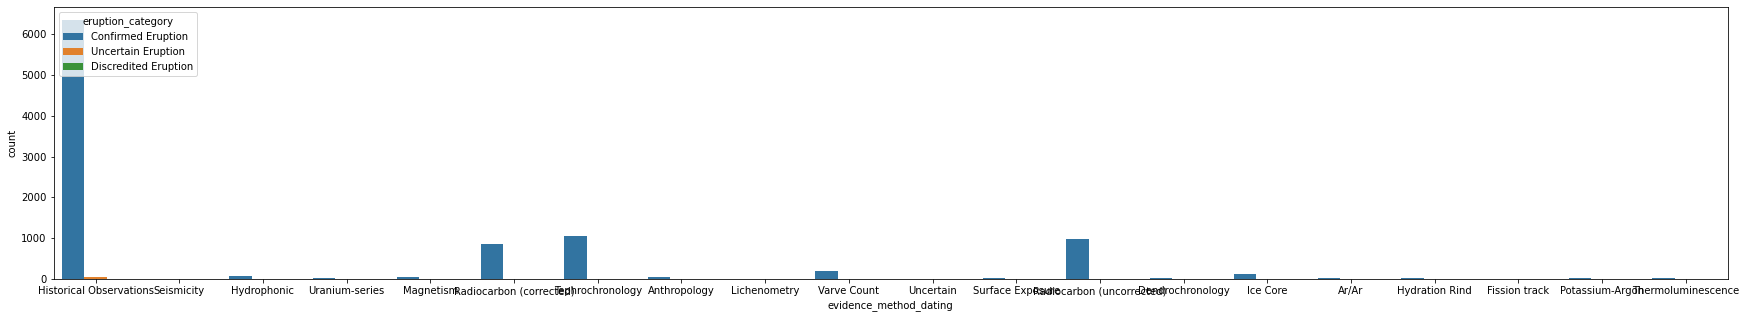

In [73]:
fig, ax = plt.subplots(figsize=(30, 5)) #atur ukuran chart
sns.countplot(x="evidence_method_dating", hue = "eruption_category",data=de)

* Dari countplot di atas dapat disimpulkan bahwa erupsi yang terkonfirmasi banyak menggunakan metude historical Observation.

#### Tabel data boxplot tahun erupsi

<AxesSubplot:xlabel='start_year'>

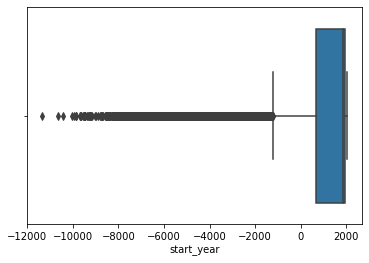

In [67]:
sns.boxplot(x="start_year",data=de)

* Dari tabel di atas dapat disimpulkan bahwa ada banyak data yang berada di outerlayer boxplot, hal itu perlu dioptimalisasi agar data valid.

### Merge Data

#### membuat tabel untuk menentukan vei maksimal dan jumlah erupsi

In [54]:
maxvei = de.groupby(["volcano_number", "volcano_name"])["vei"].max()
jum_er = de.groupby(["volcano_number", "volcano_name"])[["eruption_number"]].count().rename(columns={"eruption_number":"jumlah_erupsi"})

de_agg = pd.merge(jum_er, maxvei, how='left',on=["volcano_number", "volcano_name"])
de_agg[-5:]

,,jumlah_erupsi,vei
volcano_number,volcano_name,,
390100,Candlemas Island,4,2.0
390110,Hodson,2,2.0
390130,Zavodovski,5,2.0
390140,Protector Seamounts,1,0.0
600000,Unknown Source,77,6.0


#### Merge tabel ind dengan tabel de_agg

In [55]:
join = pd.merge(ind, de_agg, how='left',on=["volcano_number", "volcano_name"])
join[:5]

,volcano_number,volcano_name,primary_volcano_type,country,region,subregion,latitude,longitude,elevation,evidence_category,population_within_5_km,population_within_10_km,population_within_30_km,jumlah_erupsi,vei
0,264020,Agung,Stratovolcano,Indonesia,Indonesia,Lesser Sunda Islands,-8.343,115.508,2997,Eruption Observed,5657,76781,968381,5.0,5.0
1,268072,Amasing,Stratovolcano(es),Indonesia,Indonesia,Halmahera,-0.530,127.480,1030,Evidence Credible,59,803,26015,NaN,NaN
2,266020,Ambang,Complex,Indonesia,Indonesia,Sulawesi,0.750,124.420,1795,Eruption Observed,9155,46469,319137,2.0,2.0
3,263290,Arjuno-Welirang,Stratovolcano,Indonesia,Indonesia,Java,-7.733,112.575,3339,Eruption Observed,2584,53983,4143137,3.0,2.0
4,265090,Banda Api,Caldera,Indonesia,Indonesia,Banda Sea,-4.523,129.881,596,Eruption Observed,5682,5682,5810,27.0,3.0


In [34]:
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   volcano_number           95 non-null     int64  
 1   volcano_name             95 non-null     object 
 2   primary_volcano_type     95 non-null     object 
 3   country                  95 non-null     object 
 4   region                   95 non-null     object 
 5   subregion                95 non-null     object 
 6   latitude                 95 non-null     float64
 7   longitude                95 non-null     float64
 8   elevation                95 non-null     int64  
 9   evidence_category        95 non-null     object 
 10  population_within_5_km   95 non-null     int64  
 11  population_within_10_km  95 non-null     int64  
 12  population_within_30_km  95 non-null     int64  
 13  jumlah_erupsi            69 non-null     float64
 14  vei                      69 

Dapat dilihat dari join.info() ada 15 atribut dengan berbagai tipe, Total terdapat 95 baris data dan hanya ada 2 atribut dengan data null. 

### Visualisasi Data

#### Mencari hubungan atribut dengan heatmap 

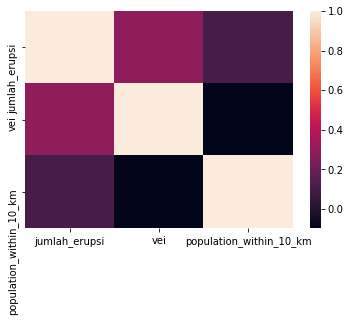

In [65]:
corr = join[["jumlah_erupsi","vei","population_within_10_km"]].corr()
ax = sns.heatmap(corr)

* Dari heatmap di atas dapat dilihat bahwa korelasi paling tinggi adalah antara vei dengan jumlah erupsi di 0.4 sedangkan yang tidak memiliki korelasi adalah vei dengan populasi.

#### Jumlah erupsi per-gunung di Indonesia dan hubungannya dengan vei

<AxesSubplot:xlabel='jumlah_erupsi', ylabel='volcano_name'>

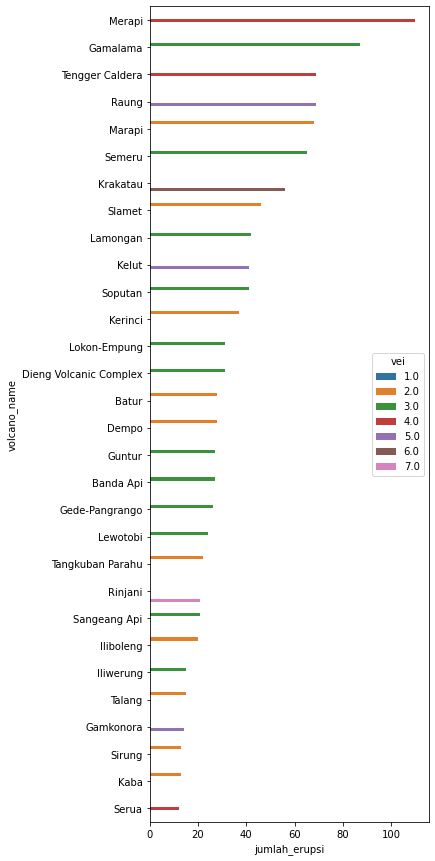

In [78]:
plot_order = join.groupby("volcano_name")["jumlah_erupsi"].sum().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(5, 15))
sns.barplot(ax=ax, x="jumlah_erupsi",y="volcano_name", hue = "vei", data = join, order = plot_order[:30])

* Dapat dilihat dari barplot di atas bahwa merapi merupakan gunung yang memiliki jumlah erupsi tertinggi di Indonesia dengan vei 4.0.
* dari data didapat angka vei tertinggi terdapat pada gunung rinjani.